In [1]:
import importlib
import tensorflow as tf
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline


from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3

from base import EnsembleNetwork
from networks import DropoutNetwork, NlpdNetwork, LrNetwork

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Linear

In [2]:
num_meta_epochs = 3#100#100#10
num_epochs = 10#15#0#50#15#5#25#50
seed = 50#42#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}

learning_rate = None#1/num_epochs
num_neurons = [10, 10, 10]
num_neurons_nonlinear = [10,10,10,10,5]
activations = [tf.nn.leaky_relu]*len(num_neurons)
activations_nonlinear = [tf.nn.leaky_relu]*len(num_neurons_nonlinear)

model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,'learning_rate':learning_rate,'l2':True}#{'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}



experiment started at 2018-08-15 11:35:23.092464
initialising Network <class 'networks.DropoutNetwork'>
experiment number 1 took 7.861508131027222 seconds. That means the whole run will probably take 23.584524393081665 more seconds and 0.3930754065513611 more minutes.
initialising Network <class 'networks.DropoutNetwork'>
initialising Network <class 'networks.DropoutNetwork'>
overall, it took 24.741952180862427 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.292438  0.822222  0.683498  0.030514
std    0.385595  0.067358  0.260594  0.023806
min    0.000532  0.783333  0.411616  0.009347
25%    0.073879  0.783333  0.559694  0.017628
50%    0.147227  0.783333  0.707772  0.025910
75%    0.438391  0.841667  0.819439  0.041098
max    0.729555  0.900000  0.931106  0.056285
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.00

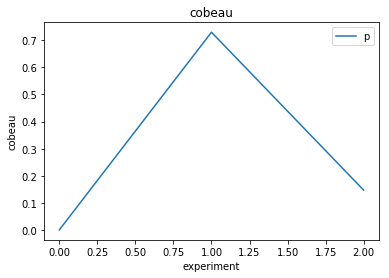

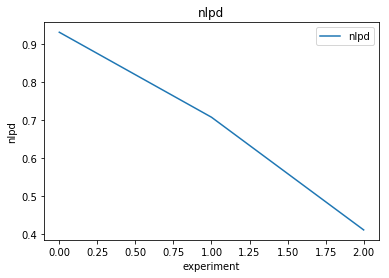

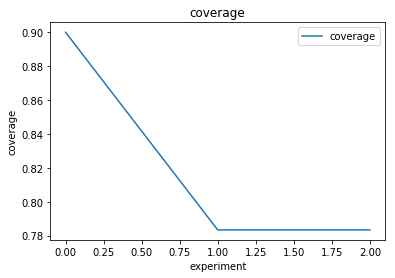

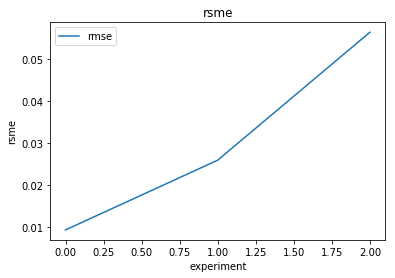

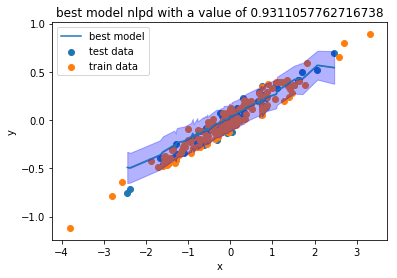

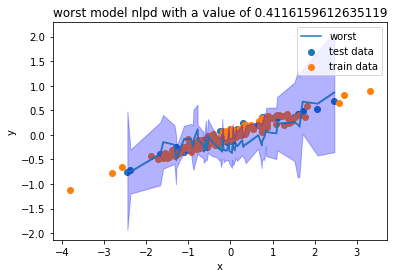

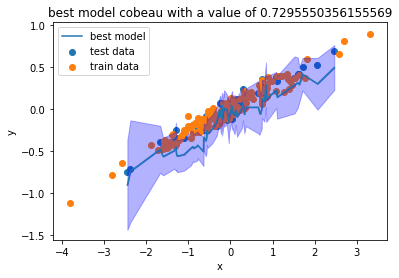

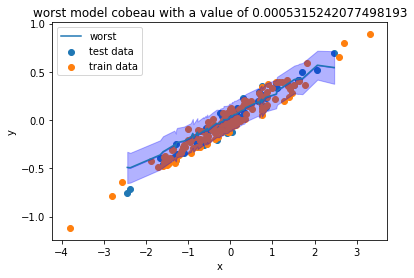

In [3]:
pd = repeat_experiment(DropoutNetwork, dataset_creation.LinearDataset,
                       num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 11:11:58.737024
experiment number 1 took 9.864104986190796 seconds. That means the whole run will probably take 29.592314958572388 more seconds and 0.4932052493095398 more minutes.
overall, it took 34.77073884010315 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.457582  0.138889  1.793039  0.011184
std    0.399763  0.129458  0.544244  0.011051
min    0.004636  0.033333  1.166608  0.004165
25%    0.305807  0.066667  1.614698  0.004815
50%    0.606979  0.100000  2.062789  0.005465
75%    0.684055  0.191667  2.106255  0.014694
max    0.761130  0.283333  2.149721  0.023923
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.457582 &  0.138889 &  1.793039 &  0.011184 \\
std   &  0.399763 &  0.129458 &  0.544244 &  0.011051 \\
min   &  0.004636 &  0.033333 &  1.166608 & 

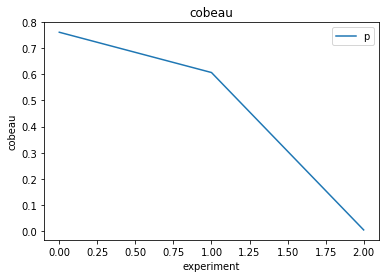

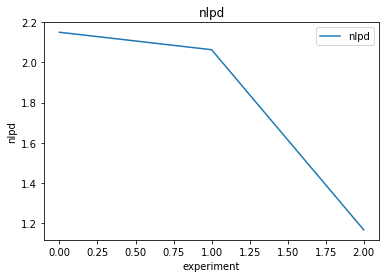

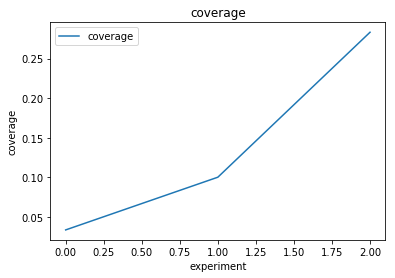

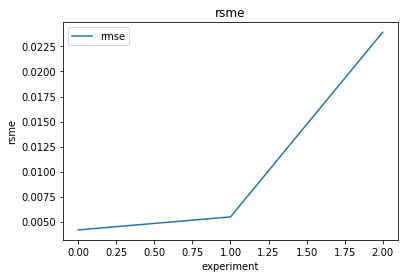

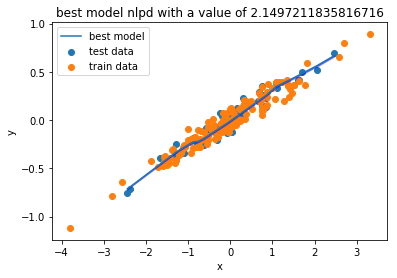

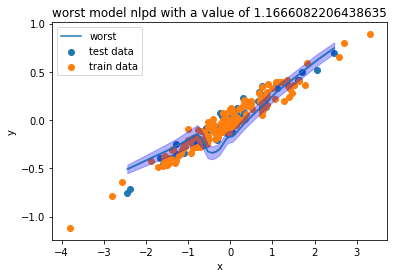

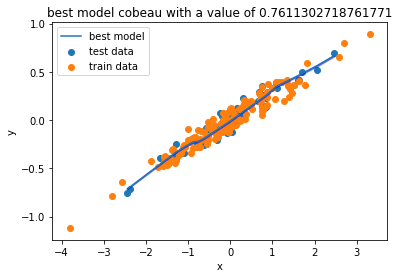

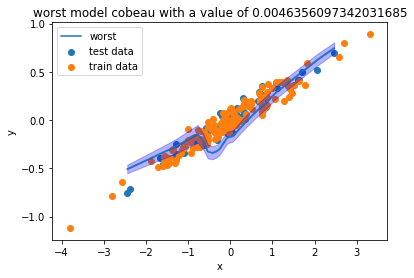

In [4]:
pd1 = repeat_experiment(NlpdNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 11:12:39.337224
experiment number 1 took 8.77781891822815 seconds. That means the whole run will probably take 26.33345675468445 more seconds and 0.4388909459114075 more minutes.
overall, it took 25.29479694366455 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.725074  0.083333  1.968076  0.006601
std    0.197851  0.033333  0.122479  0.002466
min    0.501321  0.050000  1.839186  0.005073
25%    0.649163  0.066667  1.910647  0.005178
50%    0.797006  0.083333  1.982108  0.005283
75%    0.836951  0.100000  2.032521  0.007365
max    0.876896  0.116667  2.082935  0.009446
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.725074 &  0.083333 &  1.968076 &  0.006601 \\
std   &  0.197851 &  0.033333 &  0.122479 &  0.002466 \\
min   &  0.501321 &  0.050000 &  1.839186 &  0

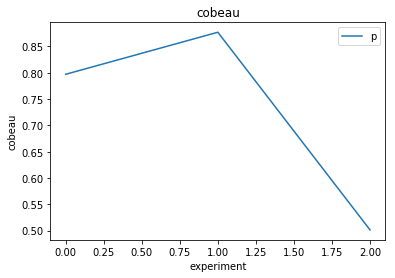

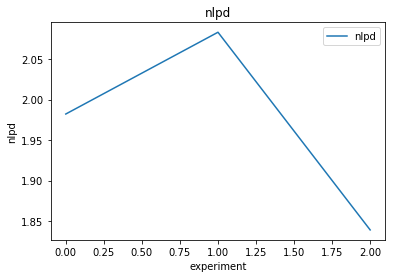

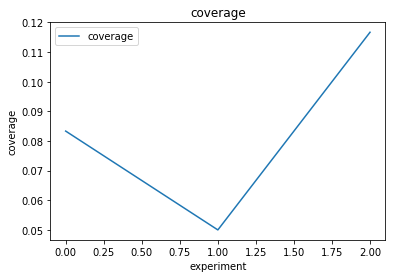

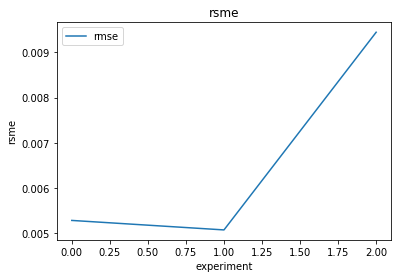

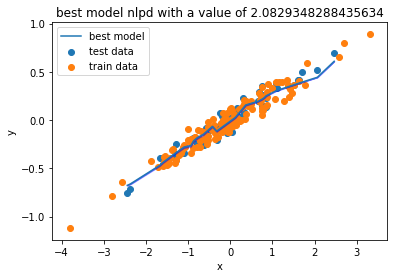

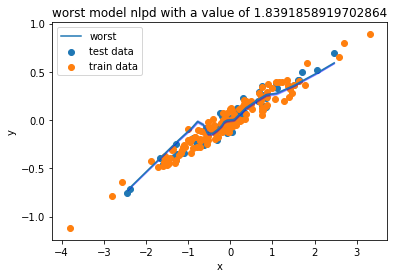

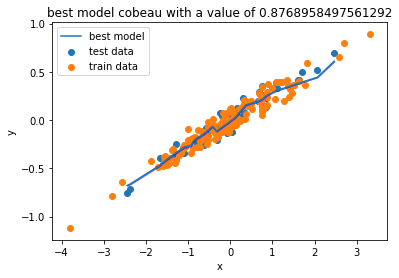

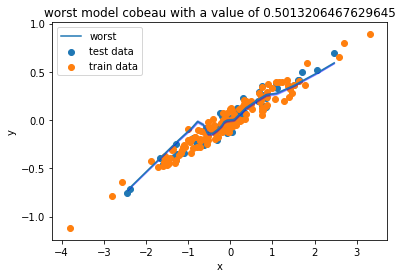

In [5]:
pd2 = repeat_experiment(LrNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [4]:
#num_meta_epochs = 5#10
#num_epochs = 10#15#50 #10
seed = 42+42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}#[5,5,5]}#

dataset_params = {'num_samples':num_samples,'seed':seed}

learning_rate = None#1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,
                'activations':activations_nonlinear,
                'l2':True
               }#{'num_epochs':num_epochs,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-15 11:35:52.552875
initialising Network <class 'networks.DropoutNetwork'>
experiment number 1 took 8.674081087112427 seconds. That means the whole run will probably take 26.02224326133728 more seconds and 0.4337040543556213 more minutes.
initialising Network <class 'networks.DropoutNetwork'>
initialising Network <class 'networks.DropoutNetwork'>
overall, it took 24.65931010246277 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.056122  0.350000 -0.171504  0.466691
std    0.092574  0.192209  0.326788  0.248765
min    0.001781  0.133333 -0.533453  0.310734
25%    0.002677  0.275000 -0.308185  0.323248
50%    0.003573  0.416667 -0.082916  0.335761
75%    0.083292  0.458333  0.009470  0.544669
max    0.163012  0.500000  0.101856  0.753577
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.0000

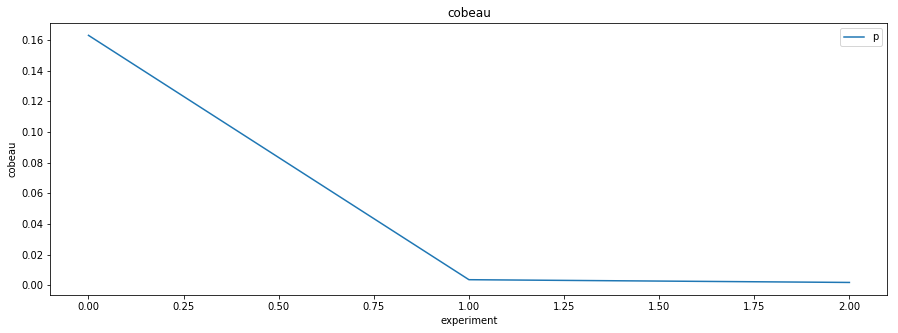

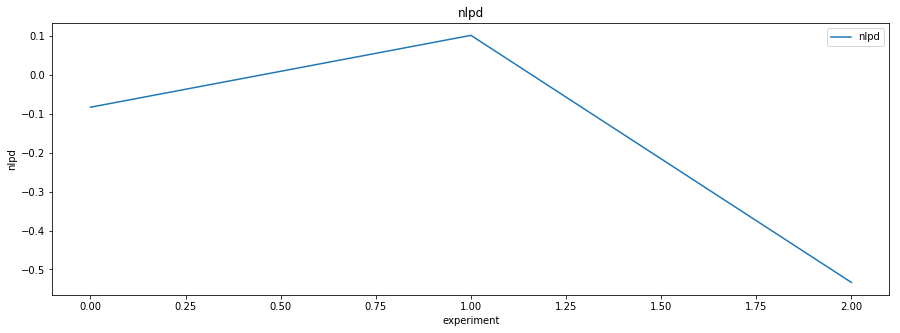

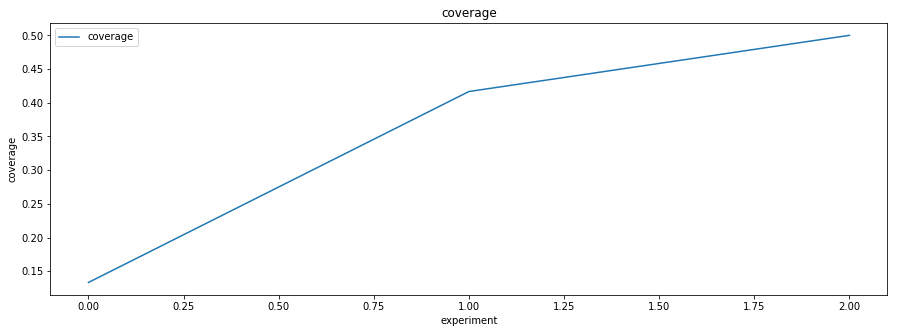

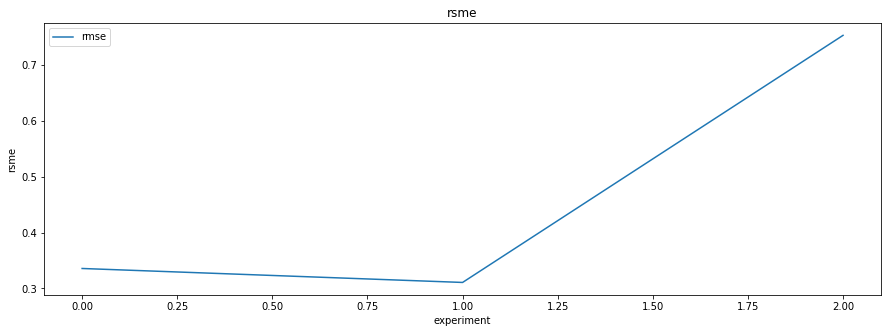

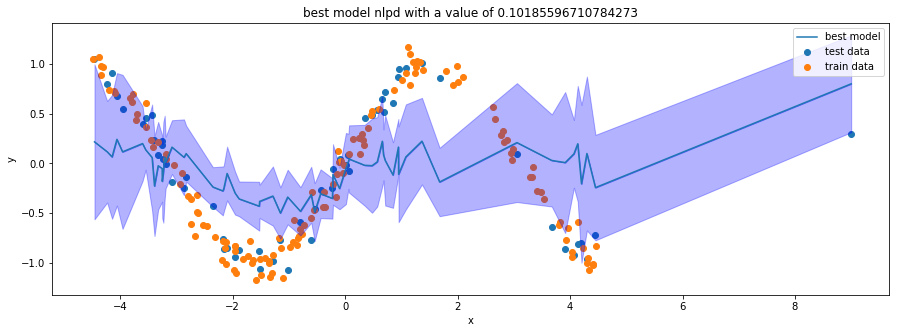

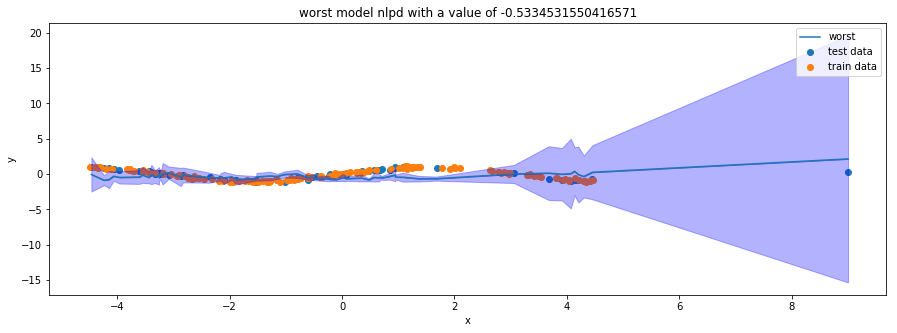

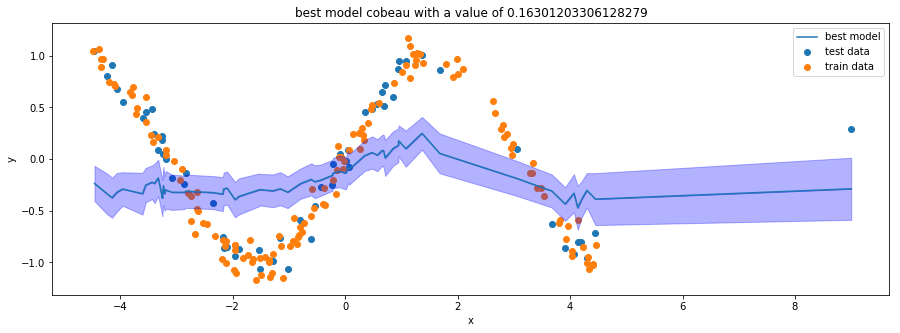

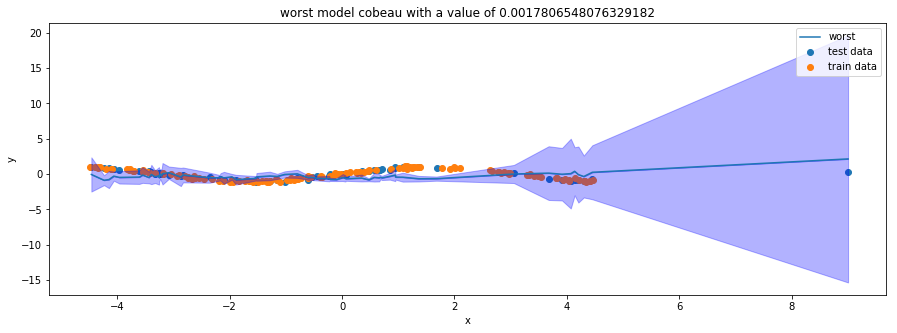

In [5]:
pd11 = repeat_experiment(DropoutNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 11:13:36.252344
experiment number 1 took 11.6792151927948 seconds. That means the whole run will probably take 35.0376455783844 more seconds and 0.58396075963974 more minutes.
overall, it took 36.90404987335205 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   3.781216e-02  0.327778 -0.012108  0.625328
std    5.512055e-02  0.220059  0.395124  0.648156
min    9.120572e-33  0.133333 -0.249523  0.136376
25%    6.189569e-03  0.208333 -0.240169  0.257733
50%    1.237914e-02  0.283333 -0.230816  0.379090
75%    5.671824e-02  0.425000  0.106599  0.869804
max    1.010573e-01  0.566667  0.444014  1.360519
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  3.781216e-02 &  0.327778 & -0.012108 &  0.625328 \\
std   &  5.512055e-02 &  0.220059 &  0.395124 &  0.648156 

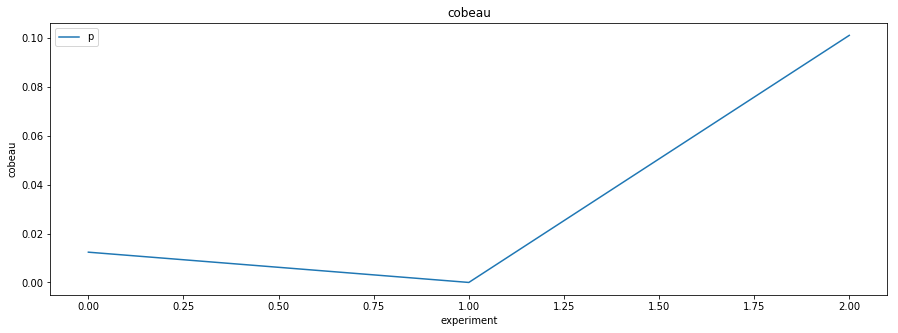

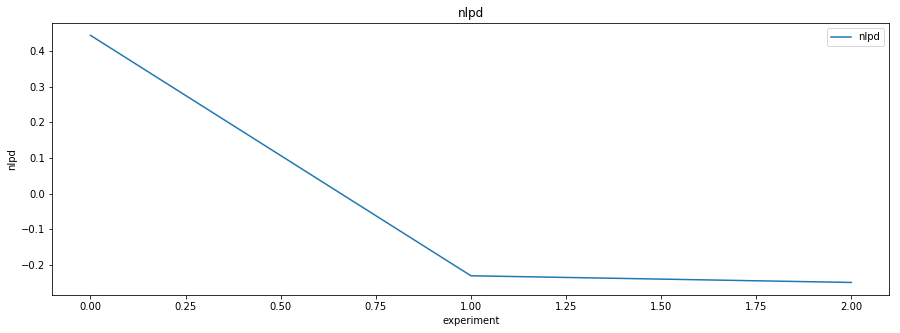

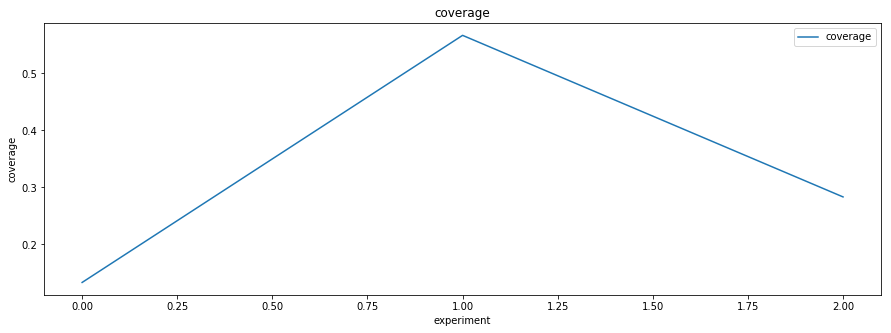

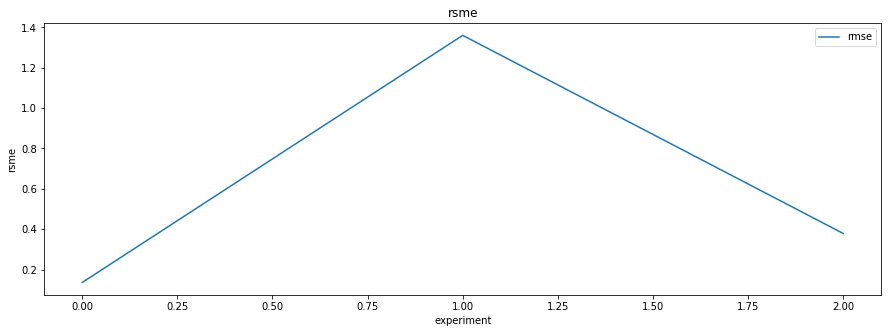

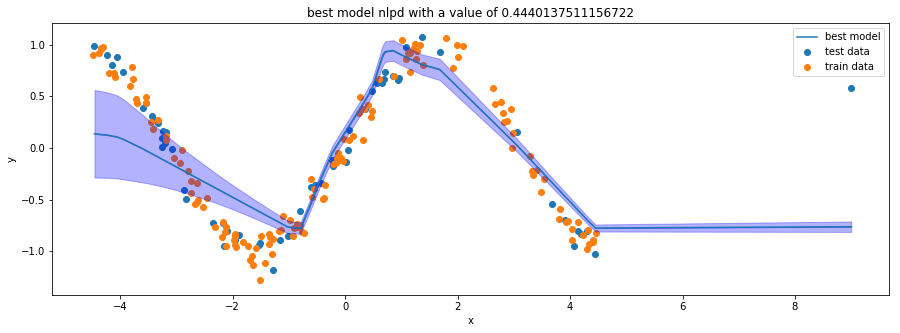

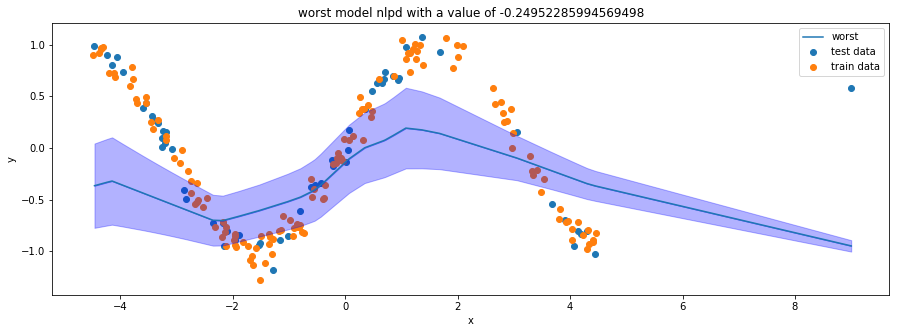

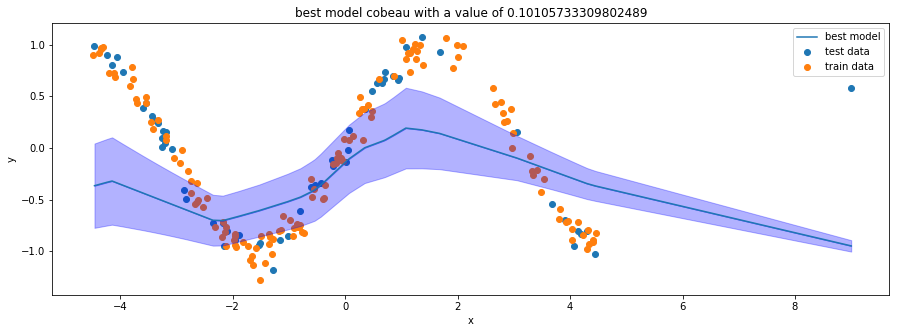

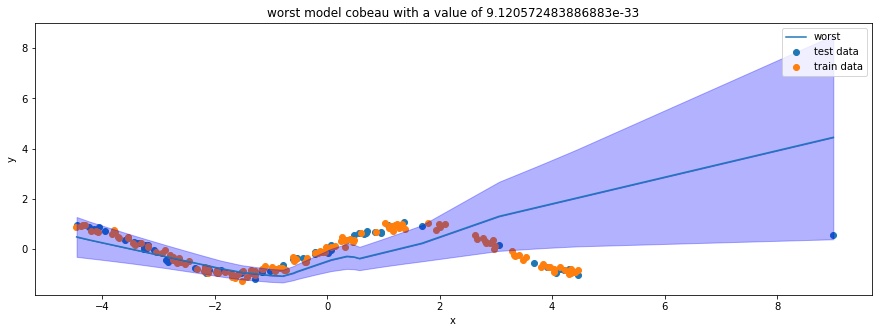

In [8]:
pd22 = repeat_experiment(NlpdNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 11:14:18.745591
experiment number 1 took 10.134039878845215 seconds. That means the whole run will probably take 30.402119636535645 more seconds and 0.5067019939422608 more minutes.
overall, it took 31.41606307029724 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.113824  0.361111 -2.248996  0.232563
std    0.001481  0.127294  3.071923  0.068911
min    0.112324  0.250000 -5.789274  0.158936
25%    0.113093  0.291667 -3.229637  0.201089
50%    0.113862  0.333333 -0.669999  0.243242
75%    0.114574  0.416667 -0.478857  0.269377
max    0.115286  0.500000 -0.287714  0.295512
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.113824 &  0.361111 & -2.248996 &  0.232563 \\
std   &  0.001481 &  0.127294 &  3.071923 &  0.068911 \\
min   &  0.112324 &  0.250000 & -5.789274 &

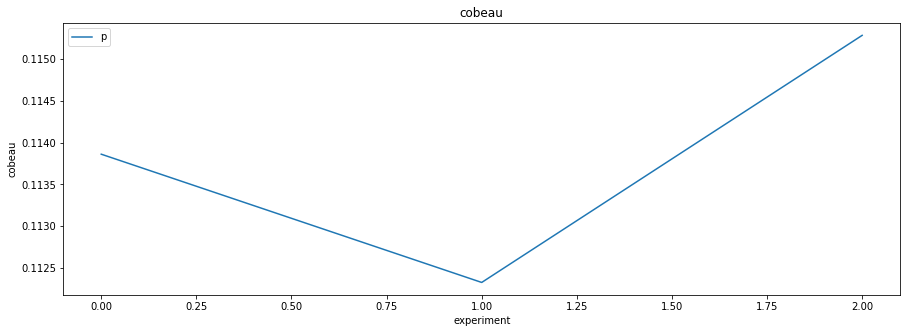

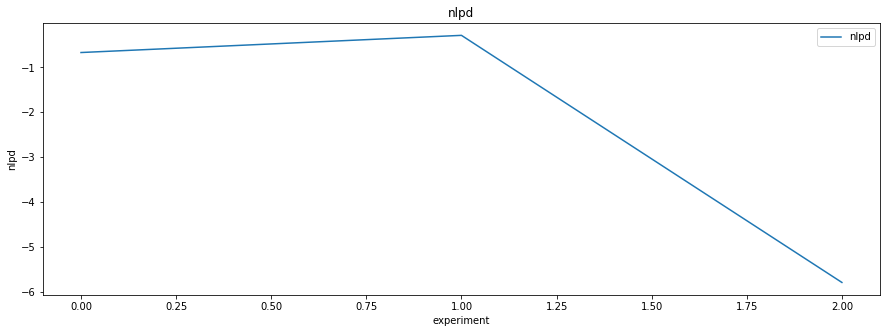

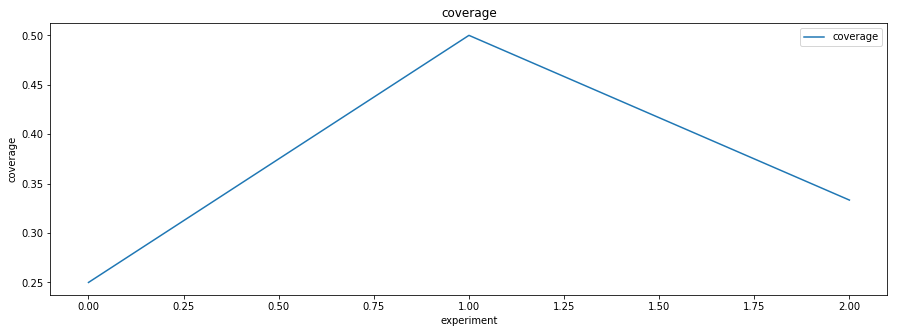

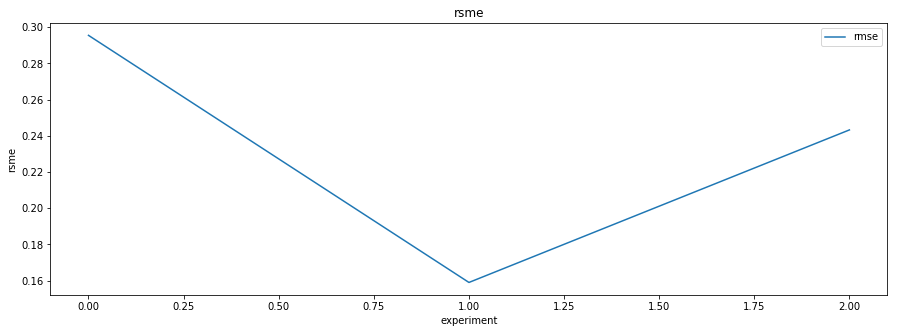

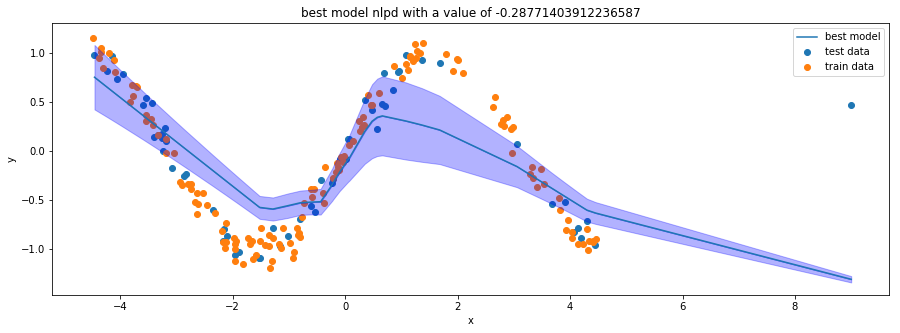

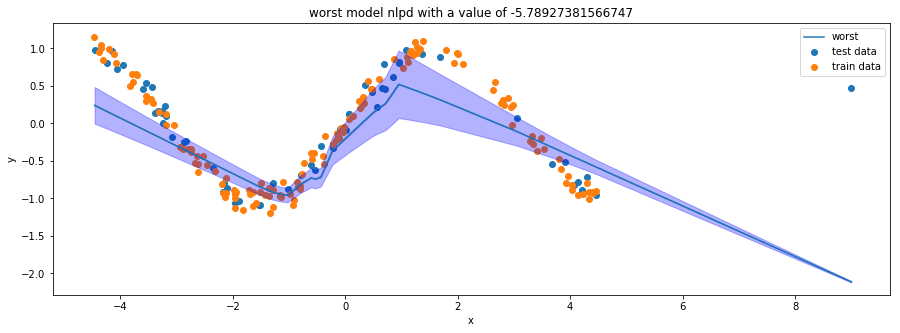

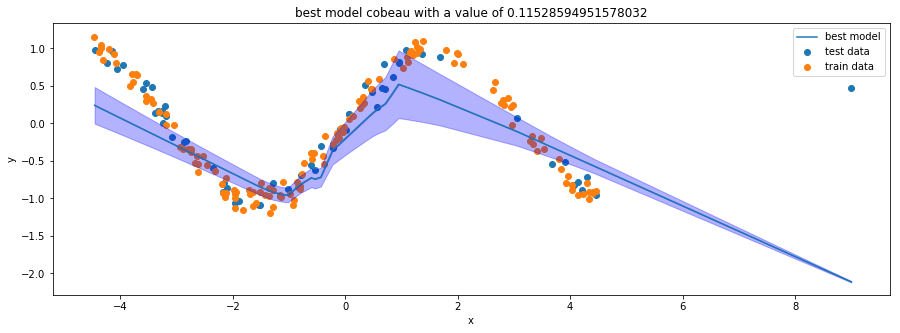

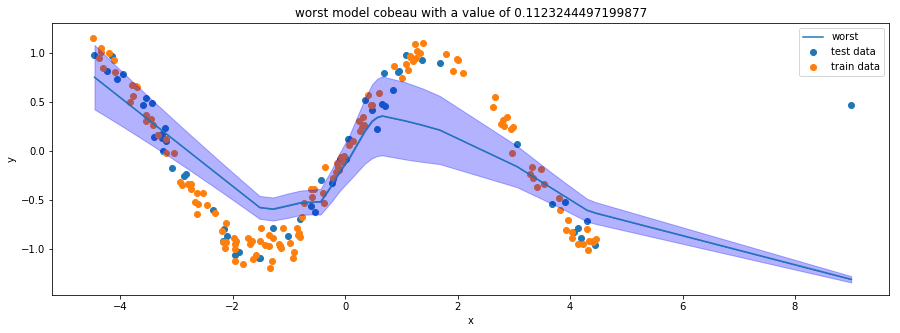

In [9]:
pd33 = repeat_experiment(LrNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# X3

In [6]:
importlib.reload(dataset_creation)

dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-15 11:36:22.089520
initialising Network <class 'networks.DropoutNetwork'>
experiment number 1 took 7.802808046340942 seconds. That means the whole run will probably take 23.408424139022827 more seconds and 0.3901404023170471 more minutes.
initialising Network <class 'networks.DropoutNetwork'>
initialising Network <class 'networks.DropoutNetwork'>
overall, it took 24.419507026672363 seconds with 3 experiments
             cobeau  coverage       nlpd        rsme
count  3.000000e+00  3.000000   3.000000    3.000000
mean   4.043819e-04  0.622222 -10.551204  403.807651
std    6.909328e-04  0.183586   2.726890   43.604888
min    1.876605e-18  0.500000 -12.551413  367.293451
25%    5.484170e-06  0.516667 -12.104264  379.667263
50%    1.096834e-05  0.533333 -11.657115  392.041074
75%    6.065728e-04  0.683333  -9.551100  422.064751
max    1.202177e-03  0.833333  -7.445085  452.088428
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &       nlpd &    

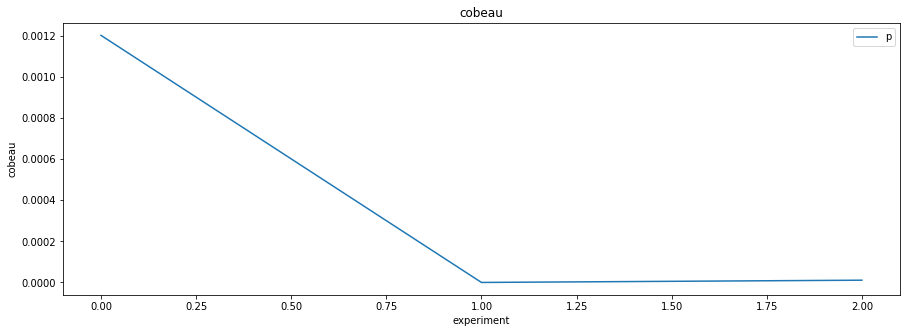

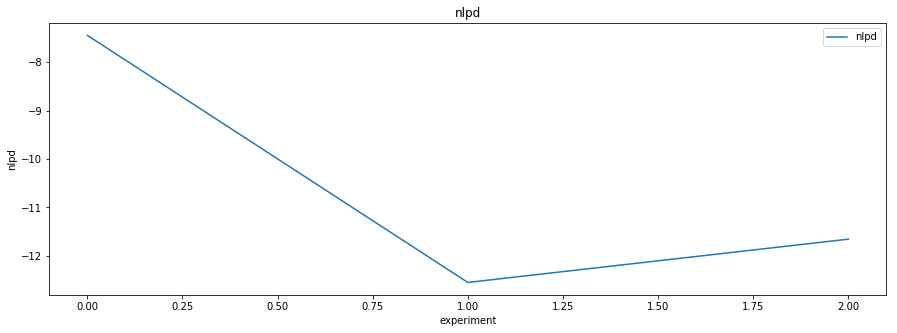

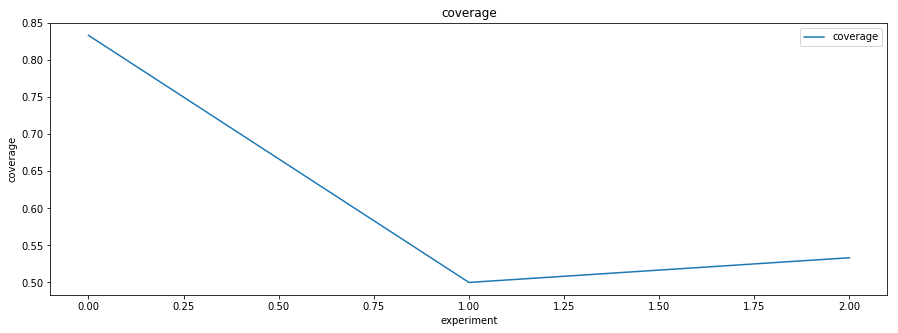

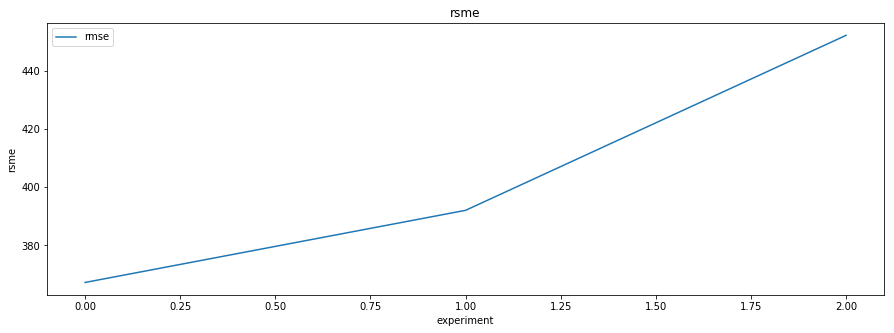

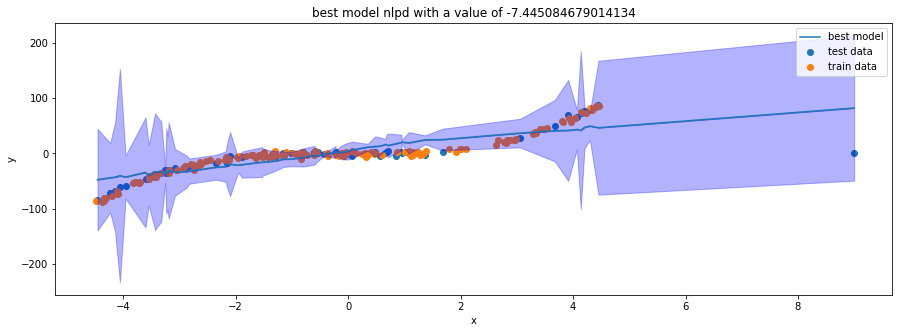

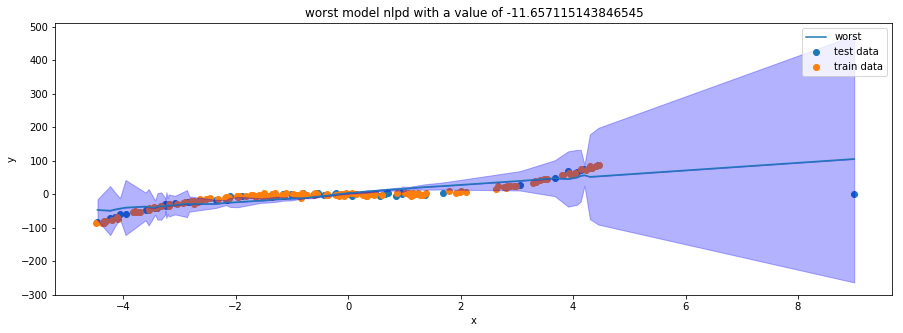

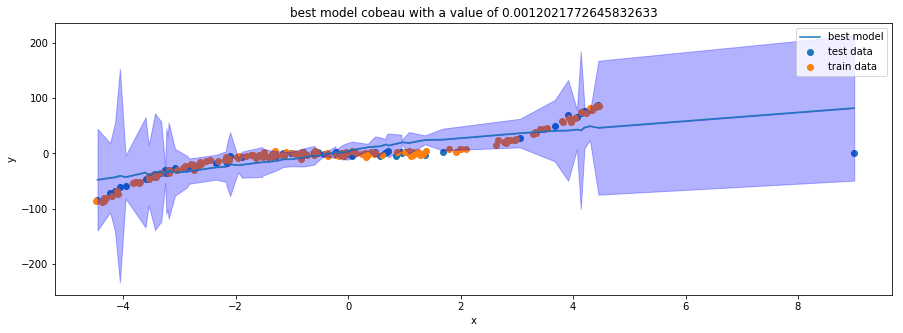

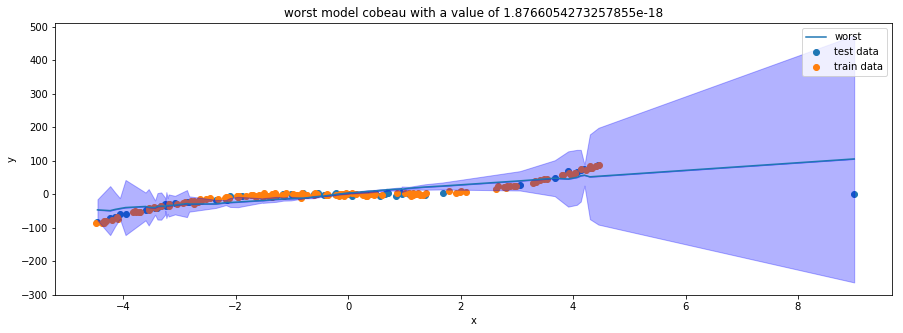

In [7]:


pd111 = repeat_experiment(DropoutNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,
                          model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 11:15:35.668257
experiment number 1 took 14.511052131652832 seconds. That means the whole run will probably take 43.533156394958496 more seconds and 0.7255526065826416 more minutes.
overall, it took 43.28323411941528 seconds with 3 experiments
             cobeau  coverage           nlpd         rsme
count  3.000000e+00  3.000000       3.000000     3.000000
mean   6.126708e-04  0.587571 -216637.979093   871.127455
std    1.061175e-03  0.399775  375196.307212   333.590765
min    2.279280e-12  0.169492 -649877.356923   531.776695
25%    1.170419e-09  0.398305 -324951.951307   707.369560
50%    2.338558e-09  0.627119     -26.545690   882.962424
75%    9.190063e-04  0.796610     -18.290177  1040.802834
max    1.838010e-03  0.966102     -10.034665  1198.643245
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &           nlpd &         rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &       3.000000 &     3.000000 \\
mean  &  6.126708e-04 &  

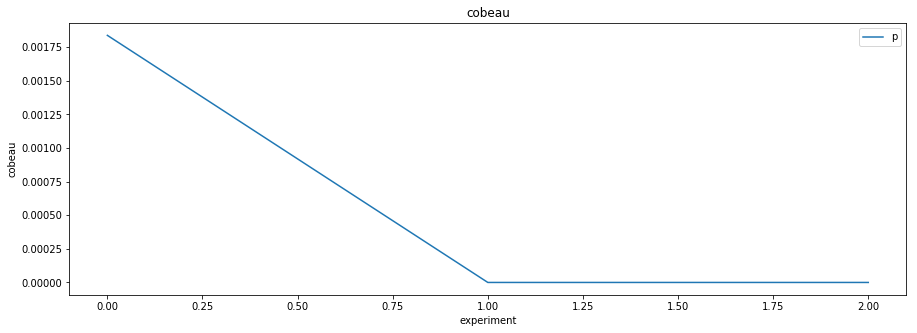

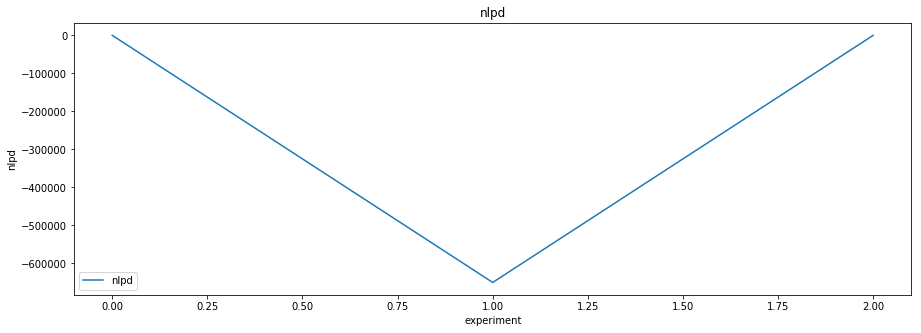

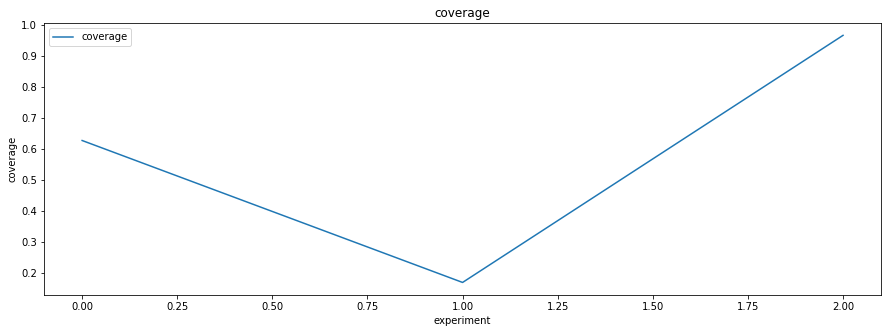

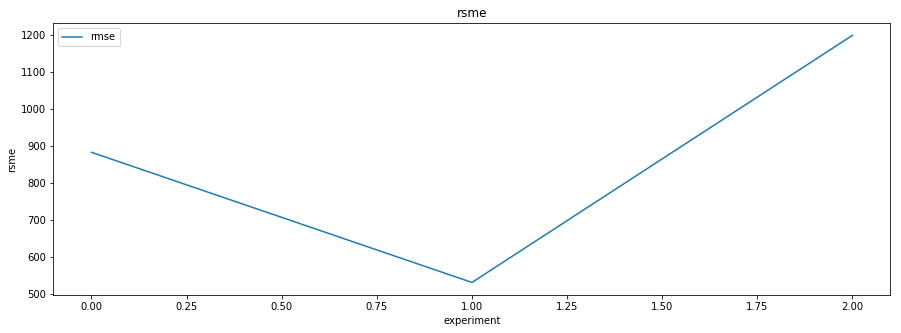

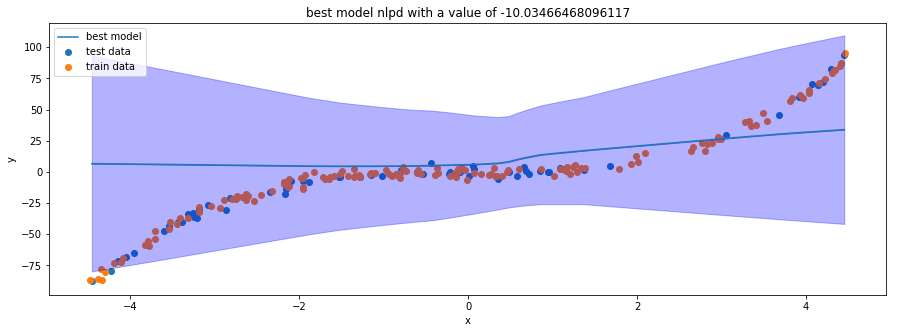

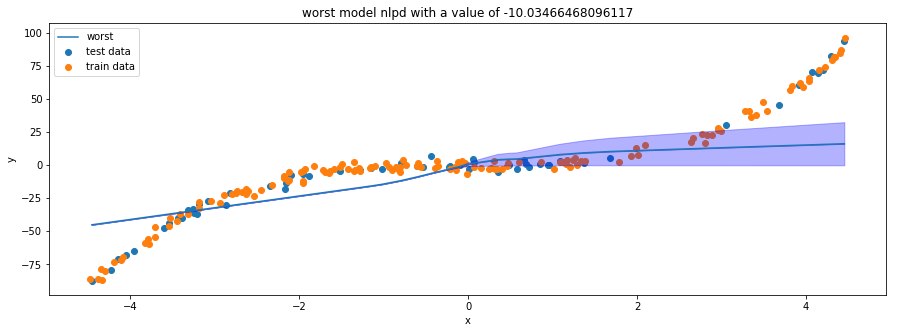

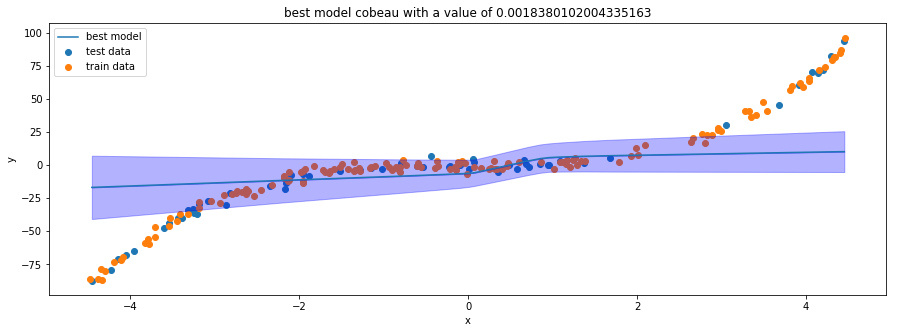

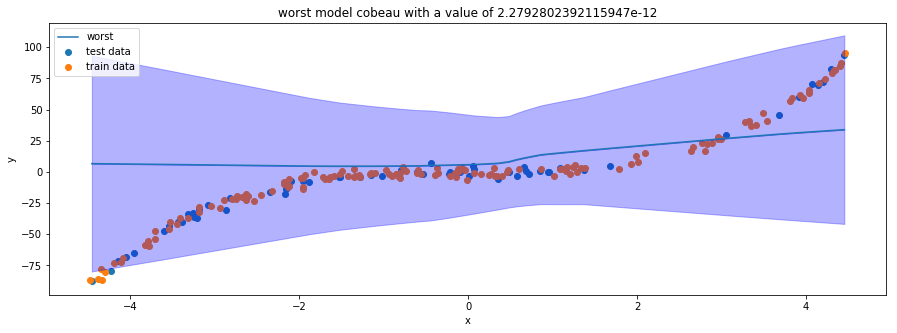

In [12]:
pd222 = repeat_experiment(NlpdNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 11:16:25.664138
experiment number 1 took 11.617981910705566 seconds. That means the whole run will probably take 34.8539457321167 more seconds and 0.5808990955352783 more minutes.
overall, it took 47.53982424736023 seconds with 3 experiments
             cobeau  coverage      nlpd        rsme
count  3.000000e+00  3.000000  3.000000    3.000000
mean   3.776204e-04  0.988701 -4.743168  385.024292
std    6.508522e-04  0.019571  3.203061  395.132211
min    3.959616e-07  0.966102 -8.439726  109.807529
25%    1.851686e-06  0.983051 -5.720210  158.643719
50%    3.307410e-06  1.000000 -3.000693  207.479909
75%    5.662327e-04  1.000000 -2.894889  522.632673
max    1.129158e-03  1.000000 -2.789086  837.785437
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &        rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &    3.000000 \\
mean  &  3.776204e-04 &  0.988701 & -4.743168 &  385.024292 \\
std   &  6.508522e-04 &  0.019

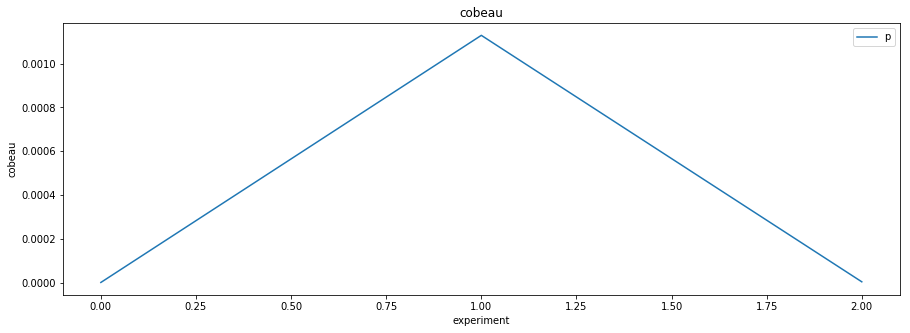

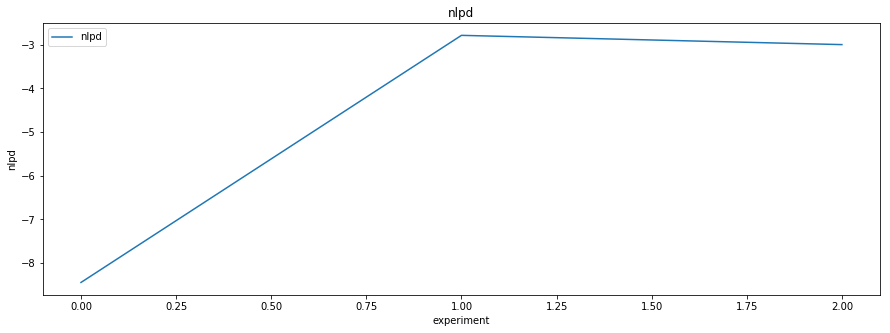

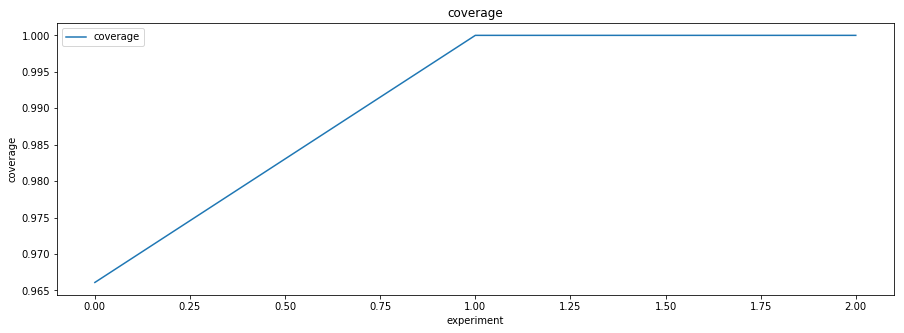

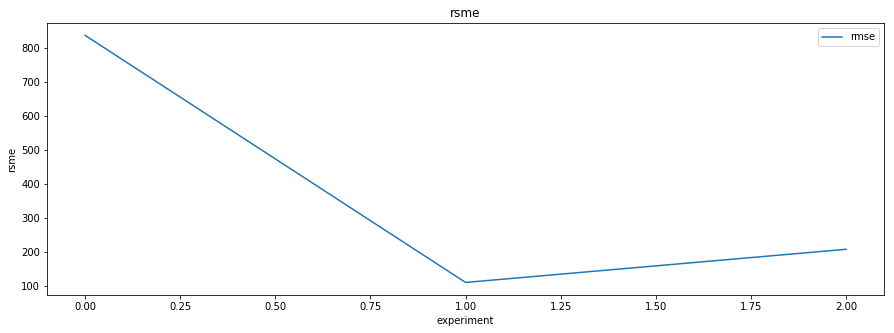

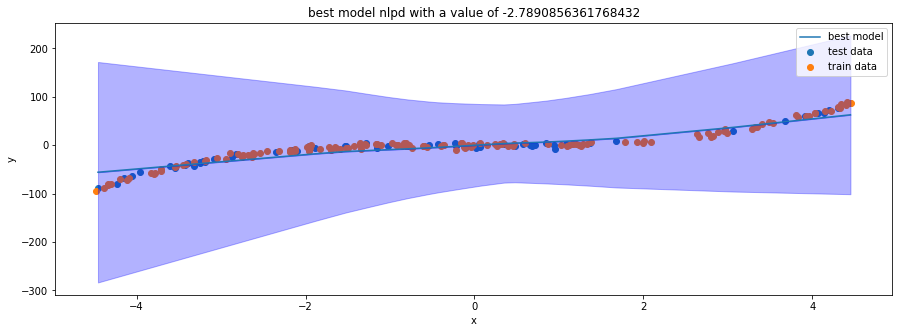

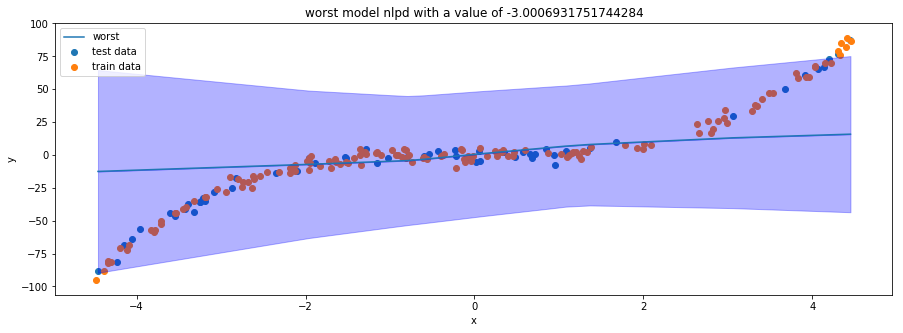

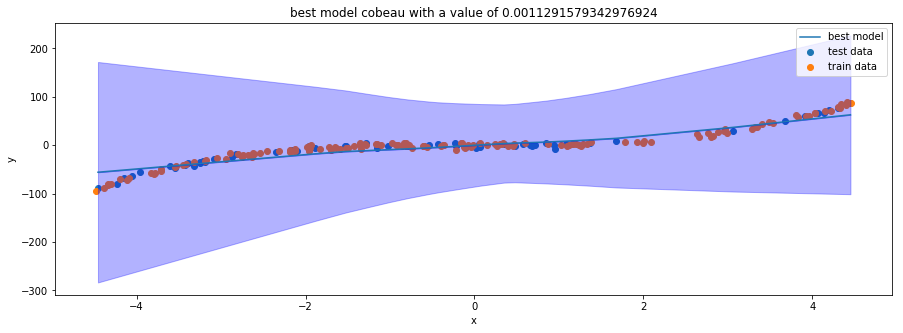

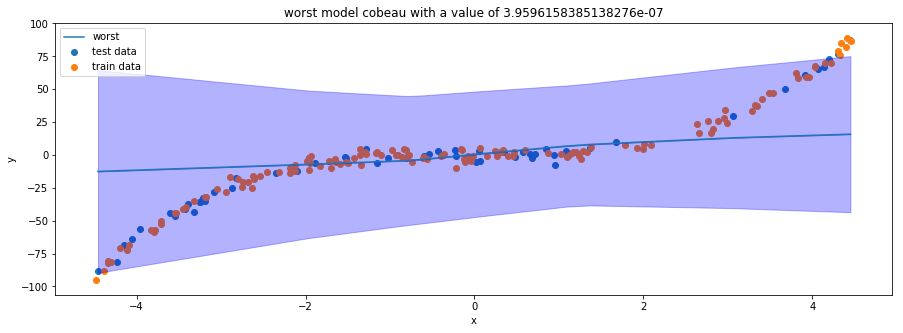

In [13]:
pd333 = repeat_experiment(LrNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)